In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
end_res = df = pd.read_csv('/Users/mbaumer/LSST_work/random_pixel_size/weak_sauce/data/firstLargeScale.csv')

In [3]:
feat = pd.DataFrame()
feat['flux'] = end_res['flux']/(.001*np.log(10)/2.5) #convert to mMags
feat[['Mx','My']] = 200*end_res[['Mx','My']] 
feat[['e1','e2']] = .2**2/.27**2*end_res[['e1','e2']]
feat[['inputE', 'inputS', 'inputTheta']] = end_res[['inputE', 'inputS', 'inputTheta']]

In [4]:
print feat.shape
feat = feat.dropna()
print feat.shape
feat = feat[np.logical_and(feat['Mx'] > -1,feat['Mx'] < 1)]
print feat.shape
feat = feat[np.logical_and(feat['My'] > -1,feat['My'] < 1)]
print feat.shape
feat = feat[np.logical_and(feat['flux'] > -500,feat['My'] < 500)]
print feat.shape

(15000, 8)
(11564, 8)
(10646, 8)
(10644, 8)
(10642, 8)


In [5]:
grouped = feat.groupby(['inputE','inputS','inputTheta'])
stats = grouped.describe()

In [6]:
stats

flux          Mx          My  \
inputE inputS inputTheta                                             
0      2      0          count  100.000000  100.000000  100.000000   
                         mean    -4.458079    0.005279    0.005936   
                         std     13.992897    0.025964    0.028046   
                         min    -37.242131   -0.049840   -0.080831   
                         25%    -13.327701   -0.009896   -0.009472   
                         50%     -7.030851    0.003586    0.003481   
                         75%      4.287559    0.021053    0.022012   
                         max     32.389391    0.081594    0.065705   
              45         count  100.000000  100.000000  100.000000   
                         mean    -4.458079    0.005279    0.005936   
                         std     13.992897    0.025964    0.028046   
                         min    -37.242131   -0.049840   -0.080831   
                         25%    -13.327701   -0.009896   -0.009472   
                         50%     -7.030851    0.003586    0.003481   
                         75%      4.287559    0.021053    0.022012   
                         max     32.389391    0.081594    0.065705   
              90         count  100.000000  100.000000  100.000000   
                         mean    -4.458079    0.005279    0.005936   
                         std     13.992897    0.025964    0.028046   
                         min    -37.242131   -0.049840   -0.080831   
                         25%    -13.327701   -0.009896   -0.009472   
                         50%     -7.030851    0.003586    0.003481   
                         75%      4.287559    0.021053    0.022012   
                         max     32.389391    0.081594    0.065705   
       3      0          count  100.000000  100.000000  100.000000   
                         mean    -4.733435    0.013578    0.017078   
                         std      9.364198    0.028071    0.031842   
                         min    -26.351766   -0.054303   -0.061050   
                         25%    -11.419883   -0.006427   -0.002405   
                         50%     -5.683573    0.016803    0.023532   
                         75%      0.296253    0.033350    0.040581   
                         max     24.724282    0.084935    0.075958   
              45         count  100.000000  100.000000  100.000000   
                         mean    -4.733435    0.013578    0.017078   
                         std      9.364198    0.028071    0.031842   
                         min    -26.351766   -0.054303   -0.061050   
                         25%    -11.419883   -0.006427   -0.002405   
                         50%     -5.683573    0.016803    0.023532   
                         75%      0.296253    0.033350    0.040581   
                         max     24.724282    0.084935    0.075958   
              90         count  100.000000  100.000000  100.000000   
                         mean    -4.733435    0.013578    0.017078   
                         std      9.364198    0.028071    0.031842   
                         min    -26.351766   -0.054303   -0.061050   
                         25%    -11.419883   -0.006427   -0.002405   
                         50%     -5.683573    0.016803    0.023532   
                         75%      0.296253    0.033350    0.040581   
                         max     24.724282    0.084935    0.075958   
       4      0          count  100.000000  100.000000  100.000000   
                         mean    -5.099618    0.021070    0.026862   
                         std      6.552819    0.040367    0.049931   
                         min    -19.138244   -0.064153   -0.100280   
                         25%     -9.229977   -0.009726   -0.003494   
                         50%     -5.553018    0.022795    0.028956   
                         75%     -1.341783    0.046830    0.062816   
                         max     13.413298    0.

##Assessing multiplicative bias at fixed size

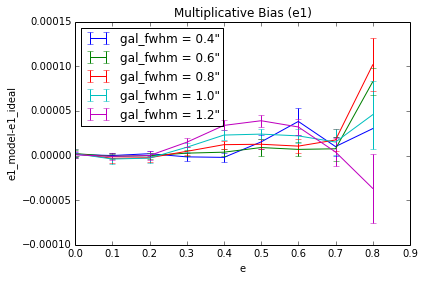

In [23]:
evec = np.arange(0,.85,.1)
for size in np.arange(2,6.1):
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for e in evec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['e1']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['e1']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(evec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='gal_fwhm = '+str(size*.2)+'\"')
plt.legend(loc=0)
plt.xlabel('e')
plt.ylabel('e1_model-e1_ideal')
plt.title('Multiplicative Bias (e1)')

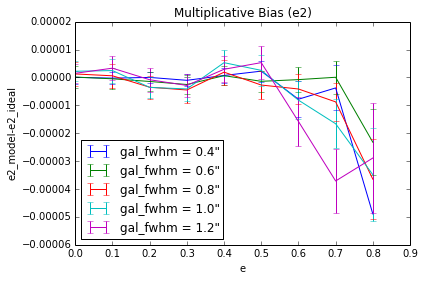

In [22]:
evec = np.arange(0,.85,.1)
for size in np.arange(2,6.1):
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for e in evec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['e2']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['e2']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(evec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='gal_fwhm = '+str(size*.2)+'\"')
plt.legend(loc=0)
plt.xlabel('e')
plt.ylabel('e2_model-e2_ideal')
plt.title('Multiplicative Bias (e2)')

##Effect on astrometry as a function of size

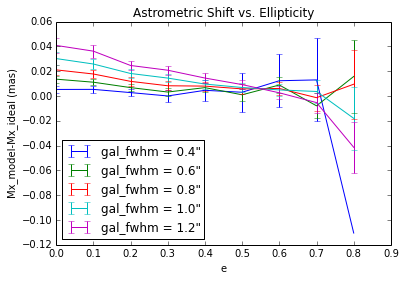

In [25]:
evec = np.arange(0,.85,.1)
for size in np.arange(2,6.1):
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for e in evec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(evec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='gal_fwhm = '+str(size*.2)+'\"')
plt.legend(loc=0)
plt.xlabel('e')
plt.ylabel('Mx_model-Mx_ideal (mas)')
plt.title('Astrometric Shift vs. Ellipticity')

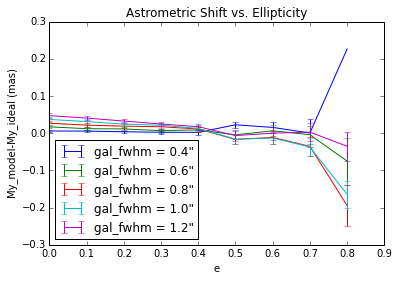

In [28]:
evec = np.arange(0,.85,.1)
for size in np.arange(2,6.1):
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for e in evec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['My']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['My']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(evec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='gal_fwhm = '+str(size*.2)+'\"')
plt.legend(loc=0)
plt.xlabel('e')
plt.ylabel('My_model-My_ideal (mas)')
plt.title('Astrometric Shift vs. Ellipticity')

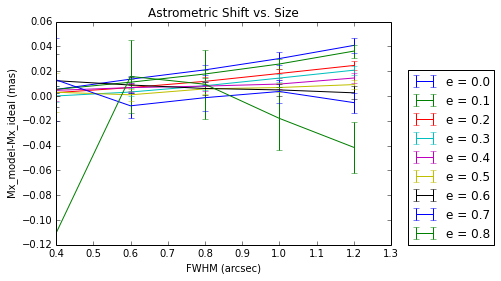

In [42]:
evec = np.arange(0,.85,.1)
svec = np.arange(2,6.1)
for e in evec:
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for size in svec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(.2*svec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='e = '+str(np.round(e,decimals=1)))
plt.legend(loc=(1.05,0))
plt.xlabel('FWHM (arcsec)')
plt.ylabel('Mx_model-Mx_ideal (mas)')
plt.title('Astrometric Shift vs. Size')

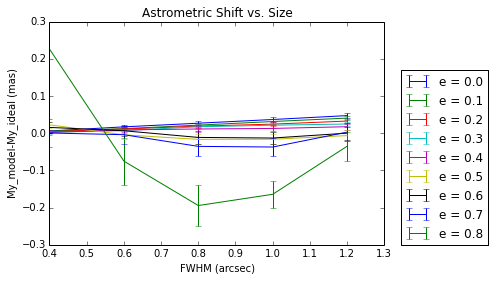

In [41]:
evec = np.arange(0,.85,.1)
svec = np.arange(2,6.1)
for e in evec:
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for size in svec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['My']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['My']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(.2*svec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='e = '+str(np.round(e,decimals=1)))
plt.legend(loc=(1.05,0))
plt.xlabel('FWHM (arcsec)')
plt.ylabel('My_model-My_ideal (mas)')
plt.title('Astrometric Shift vs. Size')

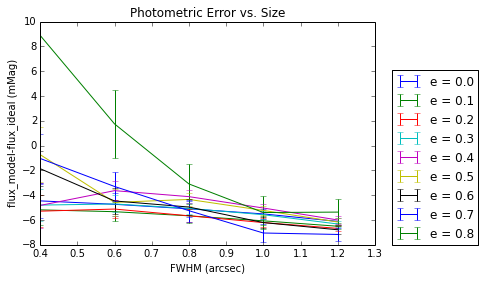

In [40]:
evec = np.arange(0,.85,.1)
svec = np.arange(2,6.1)
for e in evec:
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for size in svec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['flux']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['flux']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(.2*svec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='e = '+str(np.round(e,decimals=1)))
plt.legend(loc=(1.05,0))
plt.xlabel('FWHM (arcsec)')
plt.ylabel('flux_model-flux_ideal (mMag)')
plt.title('Photometric Error vs. Size')

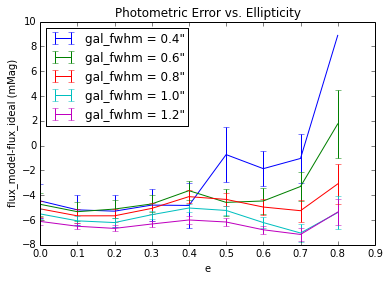

In [39]:
evec = np.arange(0,.85,.1)
for size in np.arange(2,6.1):
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for e in evec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['flux']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['flux']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(evec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='gal_fwhm = '+str(size*.2)+'\"')
plt.legend(loc=0)
plt.xlabel('e')
plt.ylabel('flux_model-flux_ideal (mMag)')
plt.title('Photometric Error vs. Ellipticity')